In [1]:
%%latex 
This Notebook plots the solutions to the heat flow equation with sinusoidal forcing at the surface
\[
  T(h, t) = T_0 + \Delta T_0 \exp\left( -h\sqrt{\frac{\omega}{2\kappa}}\right) 
    \sin\left(\omega t - h \sqrt{\frac{\omega}{2\kappa}}\right)
\]


<IPython.core.display.Latex object>

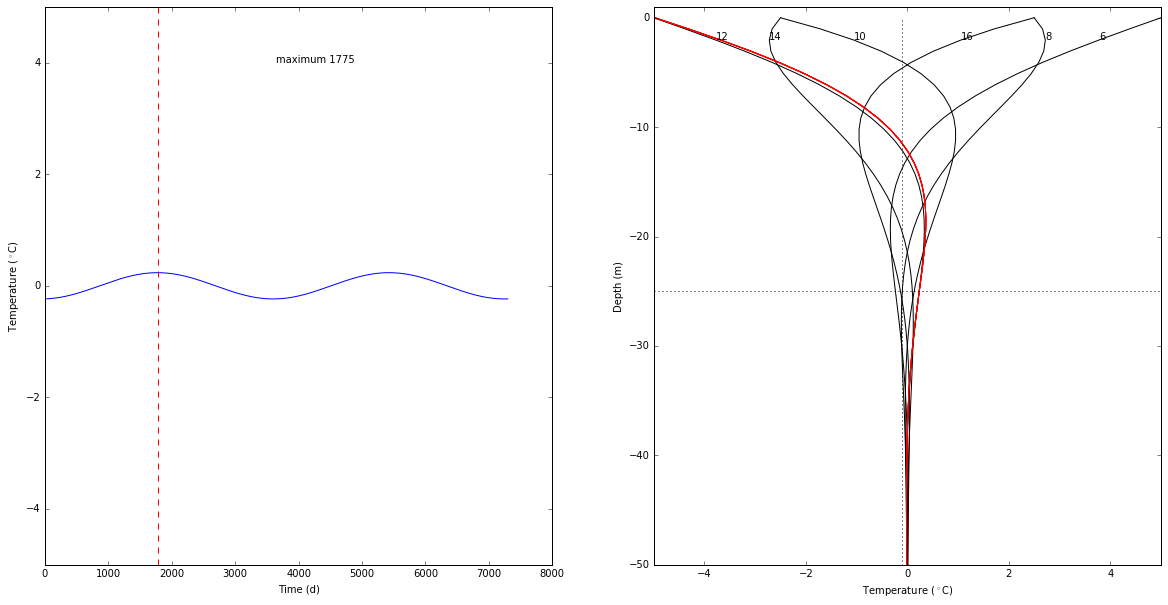

<function __main__.plotfun>

In [8]:
%matplotlib inline
import ipywidgets as ipw
import numpy as np
import pylab as plt

dT0  = 5.
period = 365. *10.                  # forcing period in days

zmax = 50.
tmax = 2*period
ts = np.arange(tmax)
zs = np.linspace(0,zmax,50)
omega = 2.*np.pi/period         # angular frequency 

def plotfun(z, rho, C, k):
    kappa = k/(rho*C) * 24. * 3600.   # our time unit is day
    fact = np.sqrt(omega/(2.*kappa))
    
    def calcdT(t,z):
        return dT0 * np.exp(-z*fact) * np.cos(omega*t-z*fact) 
    
    plt.figure(figsize=(20,10))
    # left plot
    dT = calcdT(ts, z)
    tm = ts[np.argmax(dT)]
    plt.subplot(121)
    plt.plot(ts, dT)
    plt.plot([tm]*2, [-dT0, dT0], 'r--')
    plt.text(0.5*tmax, 0.8*dT0, 'maximum %d' %tm)
    plt.ylim(-dT0, dT0)
    plt.xlabel('Time (d)')
    plt.ylabel('Temperature ($^\circ$C)')
    
    # right plot
    plt.subplot(122)
    for month in [0, 2, 4, 6, 8, 10]:
        Ts = calcdT(month*period/12., zs)
        plt.plot(Ts, -zs, 'k')
        plt.text(Ts[2],-zs[2], month+6)
        plt.plot(calcdT(tm, zs), -zs, 'r')
    plt.plot([-dT0,dT0], [-z,-z], 'k:')
    plt.xlim(-dT0, dT0)
    plt.plot([-0.1,-0.1],[-zmax,0], 'k:')
    plt.ylim(-zmax,1)
    plt.ylabel('Depth (m)')
    plt.xlabel('Temperature ($^\circ$C)')
    
    plt.show()
    
ipw.interact(plotfun, z=(0,zmax,1), rho=(500,2500,200), 
             k=(0.5,4,0.5), C=(1000,3000,500))